## 1. Support Vektor Machine (SVM)

Berlanjut dengan cerita Joko seperti pada UTS. Selain ingin memprediksi berat atau panjang ikan, Joko juga tertarik untuk melakukan klasifikasi apakah ikan tertentu termasuk ikan Gurame atau Ikan Mujair. Kemudian dia memutuskan, klasifikasi adalah berdasarkan *feature* berat dan juga panjang. Hasil pengumpulan data Joko dapat dilihat pada link berikut ini: [**Data Ikan 2**](https://drive.google.com/file/d/1DBlEemGWKSaLb4X6W7PLDpccWCFF3VnD/view?usp=sharing). 

Pada data tersebut, kolom pertama menyatakan berat ikan (dalam gram), kolom kedua menyatakan panjang ikan (dalam cm) dan kolom ketiga menyatakan jenis ikan, dimana ikan Gurame dikodekan dengan angka 1, sedangkan ikan Mujair dikodekan dengan angka 0. 

Karena Joko sudah sangat paham menyangkut *Machine Learning*, dia meminta anda untuk menggunakan Metode Support Vector Machine (SVM) sederhana untuk melakukan klasifikasi.

#### **Solusi SVM yang anda gunakan untuk membantu Joko melakukan klasifikasi jenis ikan Gurame atau Ikan Mujair mengikuti langkah-langkah berikut:**

* Copy dataset yang ada pada link di atas ke dalam direktori lokal masing-masing (untuk memudahkan tempatkan pada folder yang sama dengan file Tugas Besar anda).
* Setiap kelompok menggunakan dataset yang sama


**A. Load dataset dalam format CSV tersebut** 

* Anda bisa menggunakan package `Pandas` maupun `Numpy`.

In [ ]:
# Kode poin A di sini
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ikan2 = pd.read_csv('IkanIndo01.csv',names=['berat ikan','panjang ikan','jenis']) #inisialisasi datasetnya
print(ikan2) #menampilkan datasetnya


     berat ikan  panjang ikan  jenis
0         242.0          30.0      1
1         290.0          31.2      1
2         340.0          31.1      1
3         363.0          33.5      1
4         430.0          34.0      1
..          ...           ...    ...
153        12.2          13.4      0
154        13.4          13.5      0
155        12.2          13.8      0
156        19.7          15.2      0
157        19.9          16.2      0

[158 rows x 3 columns]


**B. Atur data ke dalam matriks feature X dan target vektor y, kemudian plot data dalam dua dimensi**

Catatan: sumbu x --> Feature 1 (berat ikan), sumbu y --> Feature 2 (panjang ikan), untuk *class* ikan Gurame (1) gunakan *square* warna biru (`'bs'`) dan untuk *class* ikan Mujair (0) gunakan *circle* warna hijau (`'go'`).

Text(0.5, 1.0, 'Dataset Data Ikan 2')

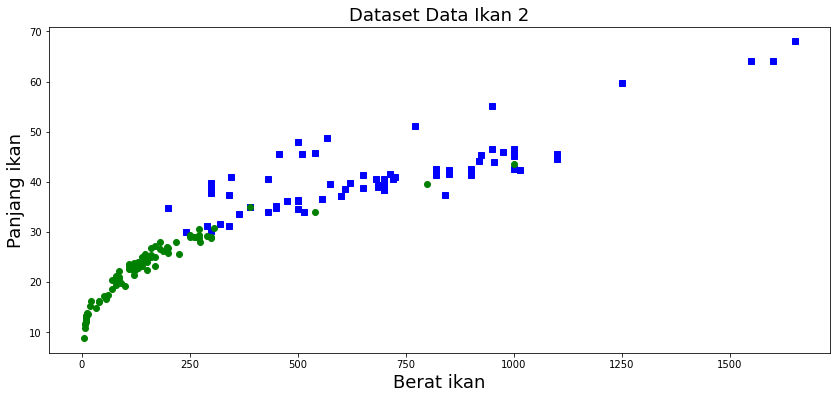

In [ ]:
# Kode poin B di sini

#Atur data ke dalam matriks feature X dan target vektor y

from sklearn.model_selection import train_test_split

X = np.array(ikan2[['berat ikan','panjang ikan']])
y = np.array(ikan2['jenis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#plot data dalam dua dimensi 
Gurame = ikan2.loc[(ikan2['jenis'] == 1)]
Mujair = ikan2.loc[(ikan2['jenis'] == 0)]
WeightGurame = Gurame['berat ikan']
LengthGurame = Gurame['panjang ikan']
WeightMujair = Mujair['berat ikan']
LengthMujair = Mujair['panjang ikan']

plt.figure(figsize=(14,6))
plt.plot(WeightGurame, LengthGurame, "bs", linewidth=0, label="Ikan Gurame")
plt.plot(WeightMujair, LengthMujair, "go", linewidth=0, label="Ikan Mujair")
plt.xlabel("Berat ikan", fontsize=18)
plt.ylabel("Panjang ikan", fontsize=18)
plt.title('Dataset Data Ikan 2', fontsize=18)


**C. Memilih Model Class, Penentuan Hyperparameter (jika ada) dan Fitting Model terhadap data training**

Catatan: 
- Gunakan SVM model linier untuk klasifikasi yang menggunakan hyperparameter C = 1 dan yang menggunakan hyperparameter C sangat besar mis C = 10. Bedakan nama variabelnya untuk kedua model tersebut misal: svm_clfK untuk C kecil = 1, dan svm_clfB untuk C besar = 10 

In [ ]:
# Kode Poin C di sini
from sklearn.svm import SVC

mujair_or_gurame = (y==0) | (y==1)

In [ ]:
# SVM Classifier model linier dengan C = 1 mode linear 

svm_clfK = SVC(kernel="linear", C=1)
svm_clfK.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# SVM Classifier model C sangat besar mode linear
svm_clfB = SVC(kernel="linear", C=10)
svm_clfB.fit(X_train, y_train)


SVC(C=10, kernel='linear')

In [ ]:
# mencari nilai akurasi dan besconfussion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_predK=svm_clfK.predict(X_test)
y_predB=svm_clfB.predict(X_test)
print("Nilai akurasi C=1 :\n",accuracy_score(y_test,y_predK))
print(confusion_matrix(y_test, y_predK))
print("Nilai akurasi C=10 :\n",accuracy_score(y_test,y_predB))
print(confusion_matrix(y_test, y_predB))

Nilai akurasi C=1 :
 0.9583333333333334
[[26  2]
 [ 0 20]]
Nilai akurasi C=10 :
 0.9583333333333334
[[26  2]
 [ 0 20]]


**D. Plotting Batas Keputusan (*Decision Boundary*)**

Gambar data seperti pada poin B, tetapi tambahkan batas keputusan (berupa garis lurus) yang memisahkan antara data ikan Gurame dan ikan Mujair (lihat contoh di **Chapter 5**, Gambar 5.1.). 

* Buat gambar sesuai dengan model dari poin C dengan nilai hyperparameter C = 1.

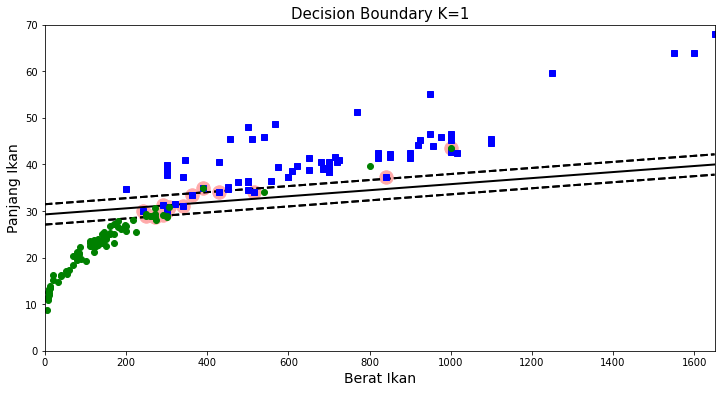

In [ ]:
# Kode poin D di sini
x0 = np.linspace(0,1650,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clfK, xmin, xmax): #untuk c = 1
    w = svm_clfK.coef_[0]
    b = svm_clfK.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clfB.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,6)) 
plt.title("Decision Boundary K=1",fontsize= 15)
plot_svc_decision_boundary(svm_clfB, 0, 1650)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")
plt.xlabel("Berat Ikan", fontsize=14)
plt.ylabel("Panjang Ikan", fontsize=14)
plt.axis([0, 1650, 0, 70])
plt.show()


* Buat gambar sesuai dengan model dari poin C dengan nilai hyperparameter besar C = 10.

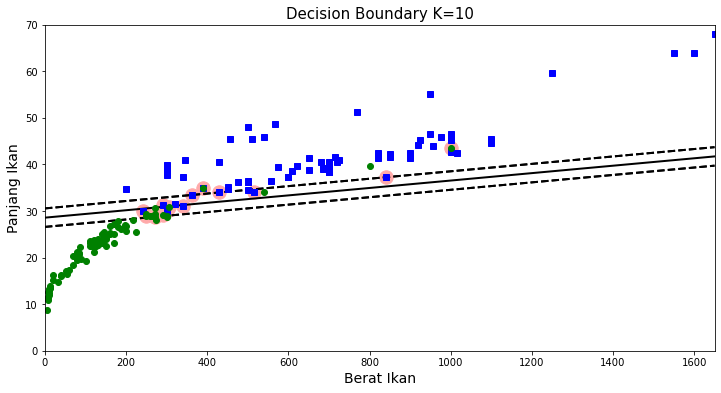

In [ ]:
# Kode di sini
# Kode poin D di sini
x0 = np.linspace(0,1650,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clfB, xmin, xmax):    # untuk clfB C = 10
    w = svm_clfK.coef_[0]
    b = svm_clfK.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clfB.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,6)) 
plt.title("Decision Boundary K=10",fontsize= 15)
plot_svc_decision_boundary(svm_clfB, 0, 1650)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")
plt.xlabel("Berat Ikan", fontsize=14)
plt.ylabel("Panjang Ikan", fontsize=14)
plt.axis([0, 1650, 0, 70])
plt.show()


* Apa kesimpulan anda jika membandingkan kedua gambar di atas dengan hyperparameter C yang berbeda (C = 1 dan C = 10)

Tidak ada perbedaan

**E. Memprediksi data baru**

Jika terdapat dua ekor ikan, dimana ikan 1 dengan berat = 200 gram dan panjang = 30 cm, sedangkan ikan 2 berat = 600 gram dan panjang = 20 cm. Tentukan jenis kedua ikan tersebut apakah ikan Gurame atau Mujaer berdasarkan model anda (Gunakan hyperparameter C = 1).

Jenis ikan apakah ikan 1 ini?

In [ ]:
# kode poin E di sini
# Ikan 1: berat = 200 gram, panjang 30 cm

dataikan=svm_clfK.predict([[200,30], [800,20]]) 
if dataikan[0] == 1:
  print("ikan 1 adalah jenis ikan gurame")
else:
  print("ikan 1 adalah jenis ikan mujair")
if dataikan[1] == 1:
  print("ikan 2 adalah jenis ikangurame")
else:
  print("ikan 2 adalah jenis ikan mujair")

ikan 1 adalah jenis ikan mujair
ikan 2 adalah jenis ikan mujair


Jenis ikan apakah ikan 2 ini?

In [ ]:
# Ikan 2: berat = 200 gram, panjang 20 cm
dataikan=svm_clfK.predict([[200,20]]) 
if dataikan[0] == 1:
  print("ikan 3 adalah jenis ikan gurame")
else:
  print("ikan 3 adalah jenis ikan mujair")

ikan 3 adalah jenis ikan mujair


## 2. Unsupervised Learning

### Keterangan Data ###

Dimisalkan anda memiliki supermarket sendiri, dan melalui kartu anggota anda bisa mendapatkan basic data tentang customer sebagai berikut:

1. Customer ID
2. umur (age)
3. Jenis Kelamin(gender)
4. Pendapatan perbulan (Annual income)
5. Skor Pembelanjaan (Spending Score) 

Yang kemudian disimpan dalam betuk Dataset pada link berikut: https://drive.google.com/file/d/1F8U_UcYktotQvncjFyxWdggkXB5bwOog/view?usp=sharing



Skor Pembelanjaan adalah sesuatu yang ditetapkan kepada pelanggan berdasarkan parameter yang Anda tentukan seperti perilaku pelanggan dan data pembelian.


Anda tertarik untuk melakukan clustering data target customer bedasarkan data diatas sehingga hasilnya bisa digunakan tim marketing untuk membuat strategi pemasaran. Beberapa hal yang anda ingin dapatkan dan lakukan adalah sebagai berikut:

A. Ploting data dan pilih data yang sesuai untuk melakukan clustering

B. Mencari nilai inerstia dan silhouette, analisis dan tentukan nilai k nya

C. Melakukan proses clustering dengan hasil nilai k yang ditentukan

D. Analisis hasil clustering berdasarkan cluster center dengan data realnya

Empat poin di atas dilakukan dengan pemprograman Python dan Scikit-Learn: 

**A. Load dataset dalam format CSV tersebut, kemudian Ploting data dan pilih data yang sesuai untuk melakukan clustering**

In [1]:
# Kode poin A di sini
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from google.colab import files
filenya = files.upload() #inisialisasi datasetnya


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# mengambil annual income dan spending score untuk kebutuhan data clustering
import io
mall=pd.read_csv('Mall_Customers.csv')
X = mall.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

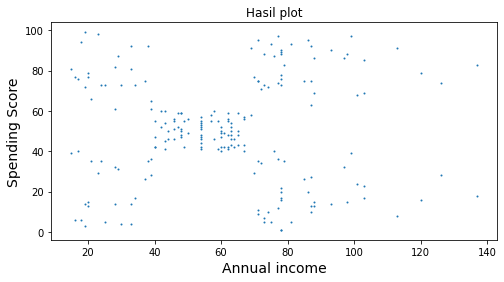

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("Annual income", fontsize=14)
    plt.ylabel("Spending Score", fontsize=14)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title('Hasil plot')
plt.show()

**B. mencari nilai inerstia dan silhouette, analisis dan tentukan nilai k-nya**

Sertakan analisis penentuan nilai k nya

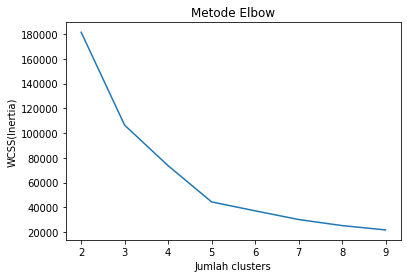

In [6]:
# Kode poin B di sini
from sklearn.cluster import KMeans
from sklearn import metrics

wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(2, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS(Inertia)')
plt.show()



Nilai k didapatkan 5 dikarenakan elbow terletak di point 5. Untuk membuktikan k = 5 terbaik , kita bandingkan dengan nilai silhoutte k = 4 dan k = 6. Nilai silhoutte jika mendekati 1 akan paling optimal.

In [7]:
# Mencari nilai silhoutte untuk k=5
km_5 = KMeans(n_clusters=5,init = 'k-means++', random_state = 42)
km_5.fit(X)
labels = km_5.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.553931997444648

In [8]:
# Mencari nilai silhoutte untuk k=6
km_6 = KMeans(n_clusters=6,init = 'k-means++', random_state = 42)
km_6.fit(X)
labels = km_6.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.5379675585622219

In [9]:
# Mencari nilai silhoutte untuk k=4
km_4 = KMeans(n_clusters=4,init = 'k-means++', random_state = 42)
km_4.fit(X)
labels = km_4.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.4931963109249047

**C. Lakukan process clustering dengan hasil nilai k yang ditentukan**

In [10]:
# Kode poin C di sini
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


**D. Analisis hasil clustering berdasarkan bedasarkan cluster center dengan data realnya**

--Uraikan poin D di sini, jika memerlukan program tambahkan bisa ditambahkan di bawah--


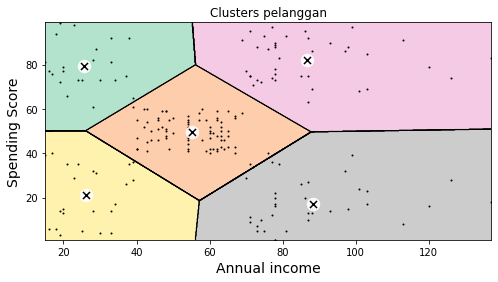

In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
    np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("Annual income", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('Spending Score', fontsize=14)
    else:
        plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))
plt.title('Clusters pelanggan')
plot_decision_boundaries(kmeans, X)
plt.show()

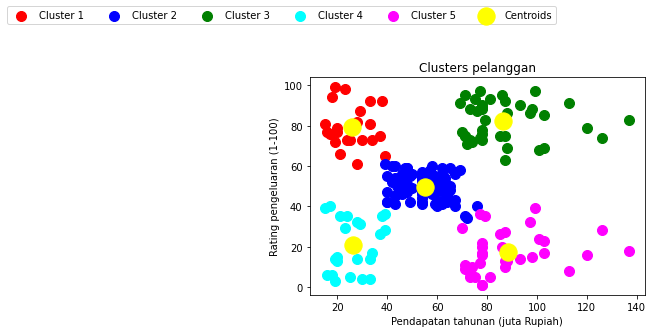

In [ ]:
# Program tambahan jika diperlukan
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Spending  (juta Rupiah)')
plt.ylabel('Annual Income (1-100)')
plt.legend(bbox_to_anchor =(0.75, 1.35), ncol = 6)

plt.show()


## 3. Dimensionality Reduction: Principle Component Analysis (PCA)

Jika dimisalkan kita ingin melakukan analisis datasets [*Breast Cancer*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dari Scikit-Learn dengan menggunakan konsep Principle Component Analysis (PCA), diantaranya ingin menentukan:
1. Principle Component (PC) yang akan diperoleh jika mempertahankan minimum 90% variansi.
2. Prosentase pengurangan data setelah dimensi dikurangi dengan PCA
3. Sebaliknya jika hanya dua principle component yang pertama yang digunakan, berapa % variansi yang tetap di-maintain oleh algoritma

Langkah pertama yang kita lakukan adalah loading dataset tersebut dan *scaling* data sehingga setiap *feature* akan mempunyai variansi 1 (*unit variance*), dengan program berikut:

In [ ]:
# Load Data
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler. transform(cancer.data)
print(scaler)
print(X_scaled.shape)

StandardScaler()
(569, 30)


`X_scaled` menjadi data yang akan kita gunakan untuk menentukan dua poin di atas.

* Jika kita ingin mempertahankan 90% variansi pada data transformasi, maka tentukan berapa Principle Component yang akan kita gunakan?

In [ ]:
# Kode di sini
# Mencari Principle yang akan digunakan
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.9) #mempertahankan variansi 90%
X_reduced= pca.fit_transform(X_scaled)
print(pca.n_components_)

7


In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9100953006967307

In [ ]:
pca = PCA(n_components= 7)
X_reduced = pca.fit_transform(X_scaled)
X_recovered = pca.inverse_transform(X_reduced)
print(X_reduced.shape)
print(X_recovered.shape)

(569, 7)
(569, 30)


In [ ]:
# mencari presentase pengurangan dimensi
print('presentase pengurangan dimensi =',(7/30)*100,'%')

presentase pengurangan dimensi = 23.333333333333332 %


* Jika kita memutuskan menggunakan data hasil pengurangan dimensi dengan mempertahankan minimum 90% variasi seperti poin di atas. Berapa prosentase data hasil pengurangan dibandingkan dengan data original?

-Jawab di sini dengan penjelasan--

Presentase pengurangan dimensi sebesar 23.333 % didapat dari hasil kolom setelah pengurangan dimensi dibagi dengan kolom sebelum pengurangan dimensi dikali 100%

* Jika kita memutuskan hanya menggunakan dua principle component pertama yang terbesar, berapa variansi data yang dijaga dan berapa prosentase data sekarang dibanding data original?

In [ ]:
# Kode untuk menjawab di sini
pca = PCA(n_components= 2) # diminta 2 principle component
X_2d = pca.fit_transform(X_scaled)
print(X_2d.shape)
print(X_scaled.shape)

#rasio Variansi
print('\nRasio Variansi\n',pca.explained_variance_ratio_)
print('\nNilai Variansi data\n',np.sum(pca.explained_variance_ratio_))


(569, 2)
(569, 30)

Rasio Variansi
 [0.44272026 0.18971182]

Nilai Variansi data
 0.6324320765155946


In [ ]:
# mencari presentase pengurangan dimensi 
print('presentase pengurangan dimensi =',(2/30)*100,'%')

presentase pengurangan dimensi = 6.666666666666667 %


-- Kemudian jelaskan di sini---

Nilai variansi data pengurangan dimensi menjadi 2 dimensi sebesar 0.63 atau 63%. Nilai presentase pengurangannya yaitu 6.666 % 